In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import random as rd
import copy
import time
from diffusion_models import Weighted_Cascade, Trivalency_Model, Independent_Cascade, Decreasing_Cascade, linear_threshold, general_threshold

In [2]:
def compare_models_num_seed(g, iter = 1000, num_seeds = 10):
  IC = Independent_Cascade()
  IC.fit(g)
  DC = Decreasing_Cascade()
  DC.fit(g)
  WC = Weighted_Cascade()
  WC.fit(g)
  TR = Trivalency_Model()
  TR.fit(g)
  LT = linear_threshold()
  LT.fit(g)
  GT = general_threshold()
  GT.fit(g)
  models = [IC, DC, WC, TR, LT, GT]
  times = np.zeros(6)
  steps = [[],[],[],[],[],[]]
  num_nodes = [[],[],[],[],[],[]]
  for _ in range(iter):
    seeds = rd.sample(list(g.nodes()), num_seeds)
    for i in range(len(models)):
      start_time = time.time()
      _, activate_nums = models[i].diffusion_all(seeds)
      end_time = time.time()
      num_nodes[i].append(sum(activate_nums))
      steps[i].append(len(activate_nums))
      times[i] += end_time - start_time
  return times/iter, np.mean(steps, axis=1), np.mean(num_nodes, axis=1)

In [3]:
G = nx.read_gml('PB2020.gml')
G = G.reverse()

In [4]:
def compare_models(g, iter = 1000, max_num_seeds = 10):
    times_list = []
    steps_list = []
    num_nodes_list = []
    for i in range(1, max_num_seeds+1):
        times, steps, num_nodes = compare_models_num_seed(G, iter, i)
        times_list.append(times)
        steps_list.append(steps)
        num_nodes_list.append(num_nodes)
    return np.array(times_list), np.array(steps_list), np.array(num_nodes_list)

In [5]:
times, steps, num_nodes = compare_models(G, 1000, 40)

In [6]:
print(times)
print(steps)
print(num_nodes)


[[2.26467180e-03 1.93697596e-03 6.24537468e-05 1.61563635e-04
  5.02510993e-02 1.13316345e-03]
 [2.75152469e-03 2.49791002e-03 2.10249662e-04 1.72233582e-04
  8.01422679e-02 3.03268433e-03]
 [5.06905603e-03 4.90244389e-03 2.16346741e-04 2.23231554e-04
  1.32317253e-01 6.14385152e-03]
 [6.49777651e-03 6.40411353e-03 3.55523109e-04 3.75150919e-04
  1.71205166e-01 8.80733991e-03]
 [9.35919714e-03 9.37444425e-03 5.13511181e-04 4.25580263e-04
  2.22535930e-01 1.27621932e-02]
 [1.11338642e-02 1.01575344e-02 5.01416683e-04 5.78394175e-04
  2.64225258e-01 1.68518898e-02]
 [1.31010289e-02 1.35477655e-02 6.09949350e-04 7.23404646e-04
  3.24058537e-01 2.47217882e-02]
 [1.49261897e-02 1.54064724e-02 7.88412333e-04 9.46117401e-04
  3.94947119e-01 3.19804392e-02]
 [1.80953047e-02 1.68141646e-02 8.71949911e-04 9.79049444e-04
  4.42585011e-01 3.96067758e-02]
 [1.99979112e-02 1.94105778e-02 1.13185239e-03 1.12004352e-03
  4.70242114e-01 4.96531317e-02]
 [2.10667846e-02 2.02077377e-02 9.62173462e-04 1.1

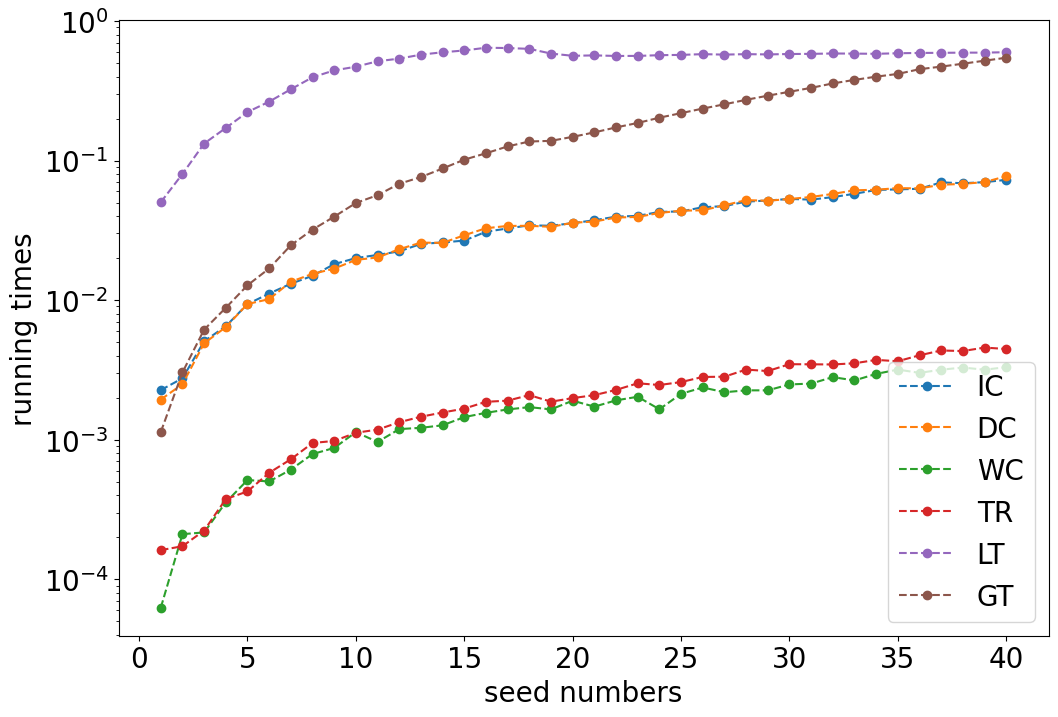

In [7]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,5], 'o--', label='GT')

plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('running times', fontsize=20)
plt.legend(fontsize=20)

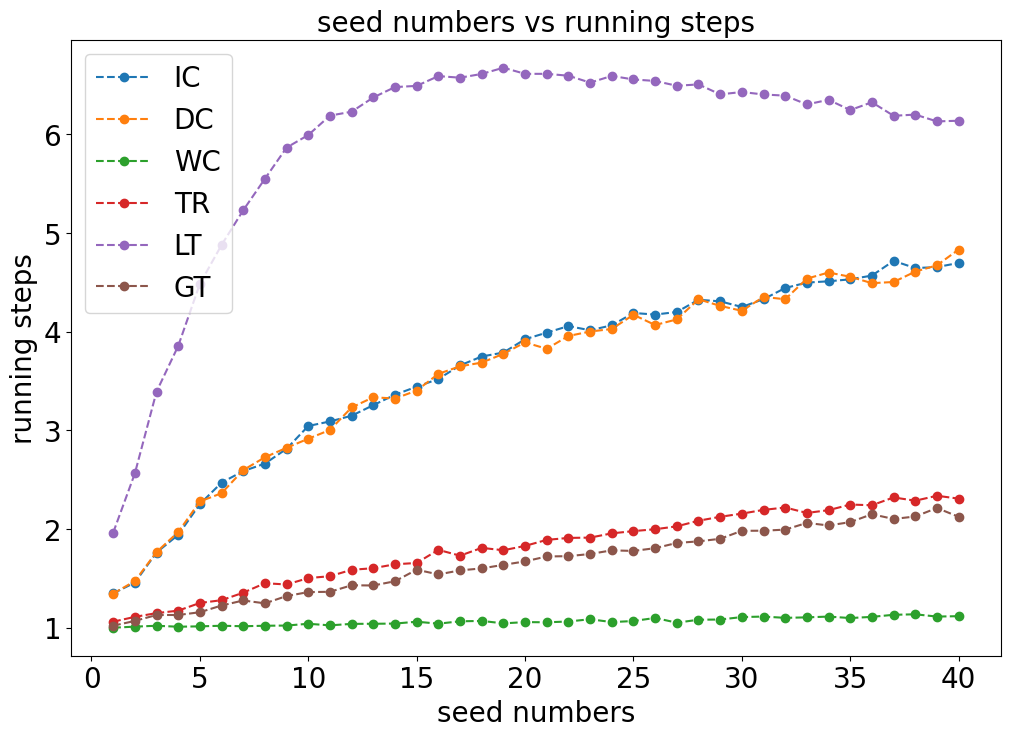

In [8]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,5], 'o--', label='GT')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('running steps', fontsize=20)
plt.title('seed numbers vs running steps', fontsize=20)
plt.legend(fontsize=20)

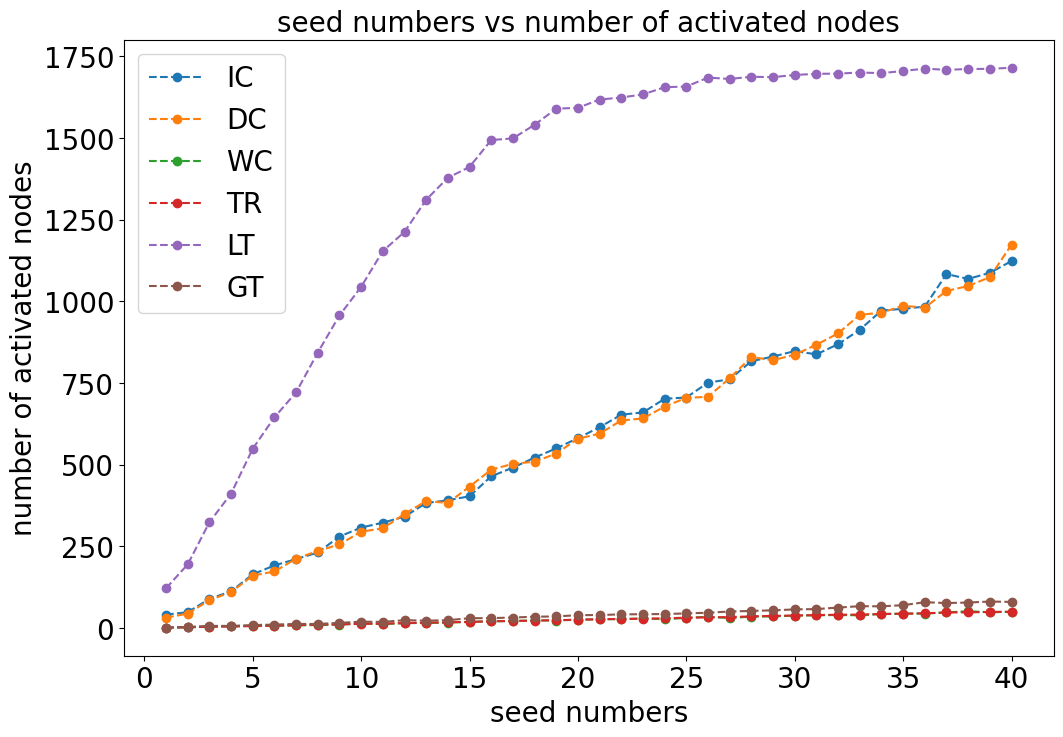

In [9]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,5], 'o--', label='GT')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('number of activated nodes', fontsize=20)
plt.title('seed numbers vs number of activated nodes', fontsize=20)
plt.legend(fontsize=20)

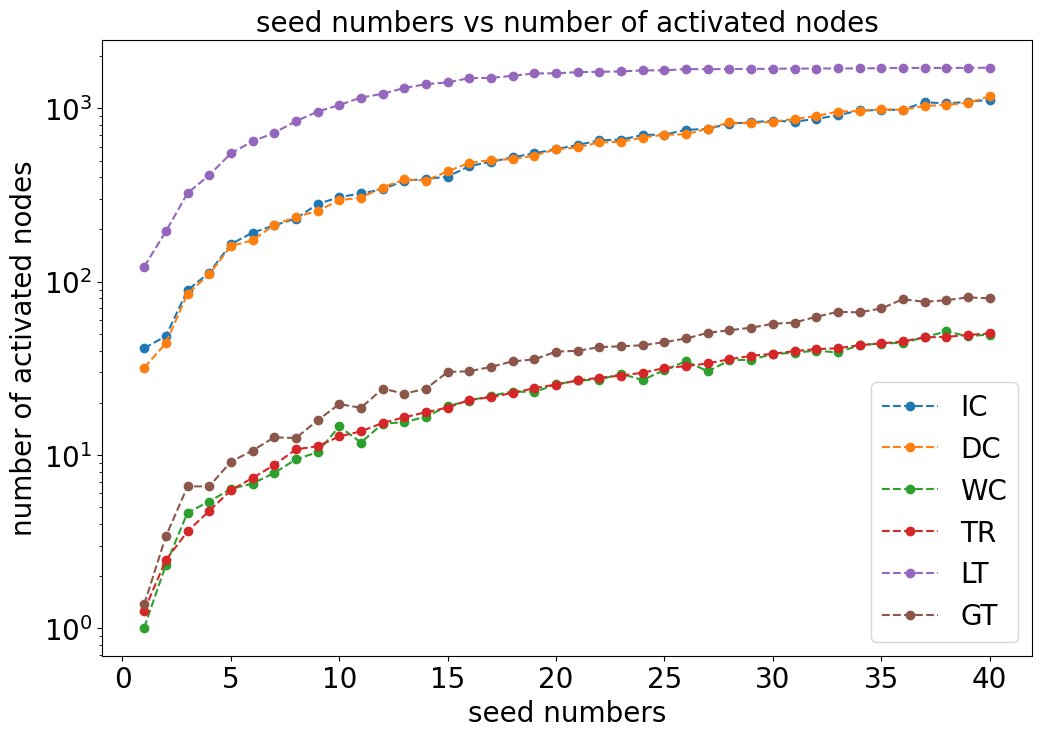

In [10]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,5], 'o--', label='GT')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('number of activated nodes', fontsize=20)
plt.title('seed numbers vs number of activated nodes', fontsize=20)
plt.legend(fontsize=20)